<a href="https://colab.research.google.com/github/1218muskan/Facial-Expression-Recognition/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Make sure to upload your kaggle credential's file to colab's local runtime storage before running below code (To directly fetch dataset from kaggle).<br>
Or, you can also directly copy-paste the credentials.

In [ ]:
import json
kaggle = open('kaggle.json')        # opening JSON file
kaggle_dict = json.load(kaggle)     # reading JSON file as dictionary

In [ ]:
# Displaying Kaggle Credentials
kaggle_dict

## Fetching Data from Kaggle

**Dataset** - [FER 2013](https://www.kaggle.com/datasets/msambare/fer2013)<br>
**Description**: The data consists of 48x48 pixel grayscale images of faces. The training set consists of *28,709* examples and the public test set consists of *3,589* examples. These faces can be classified mainly into 7 label - *Angry, Disgust, Fear, Happy, Sad, Surprise and Neutral*


In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = kaggle_dict['username']
os.environ['KAGGLE_KEY'] = kaggle_dict['key']

In [ ]:
!kaggle datasets download msambare/fer2013

 94% 57.0M/60.3M [00:00<00:00, 209MB/s]
100% 60.3M/60.3M [00:00<00:00, 187MB/s]


Dataset from kaggle is downloaded directly to colab, but it's in zip from. We need to unzip the data to use it.

In [ ]:
# unzip the dataset
!unzip fer2013.zip

In [ ]:
# Getting current working directory
os.getcwd()

'/content'

In [ ]:
os.listdir()

['.config',
 'test',
 'train',
 'kaggle.json',
 'fer2013.zip',
 '.ipynb_checkpoints',
 'sample_data']

We got 2 directories named *train* and *test* after unzipping the data, continaing training and testing images respectively.

In [ ]:
train_dir = '/content/train'
test_dir = '/content/test'

## Statistical Ananlysis

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Unique object classes/ facial expressions
os.listdir(train_dir)

['neutral', 'angry', 'surprise', 'disgust', 'sad', 'fear', 'happy']

In [ ]:
os.listdir(test_dir)

['neutral', 'angry', 'surprise', 'disgust', 'sad', 'fear', 'happy']

Therefore, we have 7 classes (or emotions) available for classification - neutral, fear, sad, happy, surprise, angry, disgust 

Now, checking number of images available in each class.

In [ ]:
def images_per_class(dir):
  dictt = { 'Expression': [], 'Images Count': []}

  for i in os.listdir(dir):
    path = dir + '/' + i
    imagesCount = len(os.listdir(path))

    dictt['Expression'].append(i)
    dictt['Images Count'].append(imagesCount)

  return dictt

In [ ]:
# No. of Training images in each class
trainImg_per_class = images_per_class(train_dir)

# converting dictionary to dataframe
trainImg_per_class_df = pd.DataFrame(trainImg_per_class)
trainImg_per_class_df

,Expression,Images Count
0,neutral,4965
1,angry,3995
2,surprise,3171
3,disgust,436
4,sad,4830
5,fear,4097
6,happy,7215


In training dataset, each class consists of approx 5,000 images accept 'happy' and 'disgust' having around 7,000 and 500 images respectively.

In [ ]:
# No. of Testing images in each class
testImg_per_class = images_per_class(test_dir)

# converting dictionary to dataframe
testImg_per_class_df = pd.DataFrame(testImg_per_class)
testImg_per_class_df

,Expression,Images Count
0,neutral,1233
1,angry,958
2,surprise,831
3,disgust,111
4,sad,1247
5,fear,1024
6,happy,1774


In test datset, each class consists of around 1,000 images for testing whereas 'disgust' only have 111 images.

In [113]:
# Total Images

print("Total training images:", sum(trainImg_per_class['Images Count']))
print("Total test images:", sum(testImg_per_class['Images Count']))

Total training images: 28709
Total test images: 7178


Therefore, total number of images available for training and testing are 28,709 and 7,178 respectively.

## Data Visulalisation 

In [ ]:
import matplotlib.pyplot as plt

Plotting Bar plot for visualising number of images per class

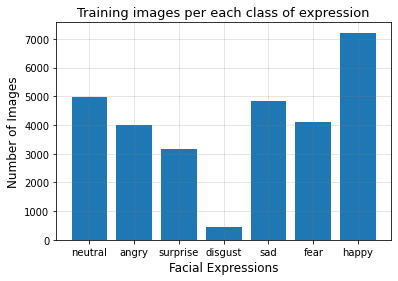

In [ ]:
# Training Dataset

x = trainImg_per_class_df['Expression']
y = trainImg_per_class_df['Images Count']

plt.bar(x,y, width=0.8)
plt.xlabel('Facial Expressions', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Training images per each class of expression', fontsize =13)
plt.grid(b = True, color ='grey', linestyle ='-', linewidth = 0.5, alpha = 0.4)
plt.show()

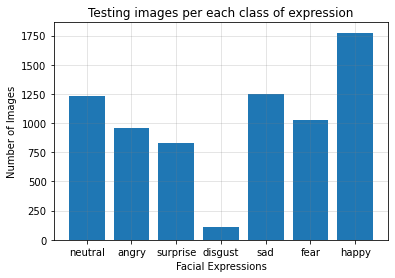

In [ ]:
# Test Dataset

x = testImg_per_class_df['Expression']
y = testImg_per_class_df['Images Count']

plt.bar(x,y)
plt.xlabel('Facial Expressions', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Testing images per each class of expression')
plt.grid(b = True, color ='grey', linestyle ='-', linewidth = 0.5, alpha = 0.4)
plt.show()

Pie Chart representing the percentage of images in each class

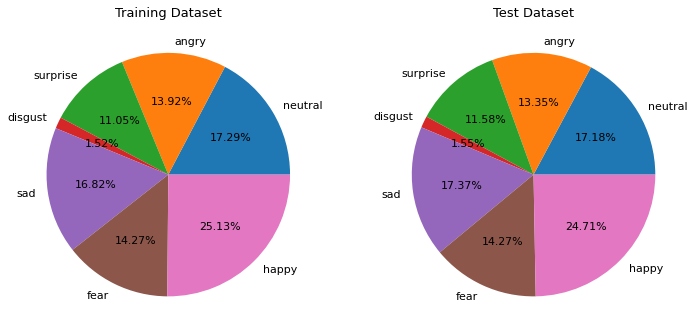

In [ ]:
train_label = trainImg_per_class_df['Expression']
train_count = trainImg_per_class_df['Images Count']
test_label = testImg_per_class_df['Expression']
test_count = testImg_per_class_df['Images Count']

plt.figure(figsize=(12,15))
plt.subplot(1,2,1)
plt.pie(train_count, labels = train_label, autopct='%1.2f%%', textprops={'fontsize': 11})
plt.title("Training Dataset", fontsize = 13)

plt.subplot(1,2,2)
plt.pie(test_count, labels = test_label, autopct='%1.2f%%', textprops={'fontsize': 11})
plt.title("Test Dataset",fontsize = 13)
plt.show()

## Displaying Images

In [ ]:
import cv2

In [ ]:
sample_path = train_dir + '/surprise'
sample_img = cv2.imread(sample_path + '/' + os.listdir(sample_path)[50])

In [ ]:
sample_img.shape

(48, 48, 3)

Dimensions of images: 48*48

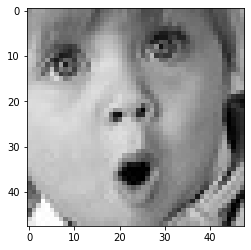

In [ ]:
plt.imshow(sample_img)

Plotting subplot for displaying few sample images for each expression

In [ ]:
def plotImages(expression):
    plt.figure(figsize=(15,2.5))
    plt.suptitle(expression, fontsize = 20)
    
    path = train_dir + '/' + expression
    imageNames = os.listdir(path)
    
    for i in range(7):
        img = cv2.imread(path + '/' + imageNames[i])
        plt.subplot(1,7,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img)

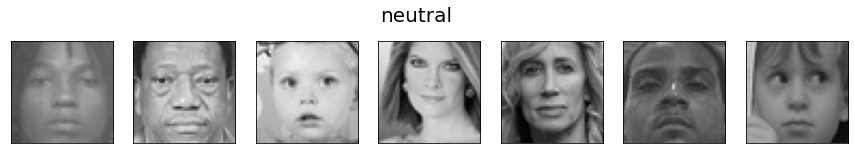

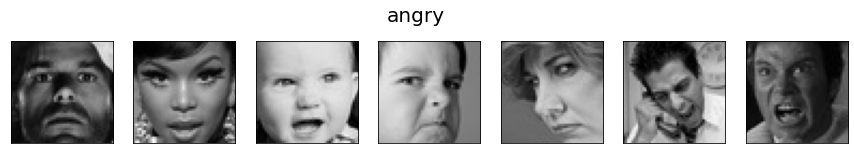

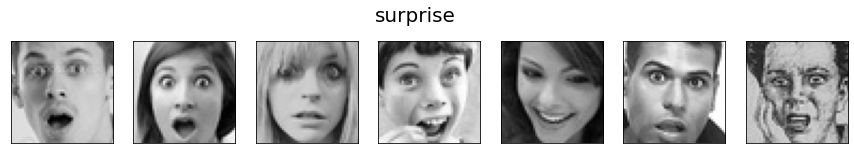

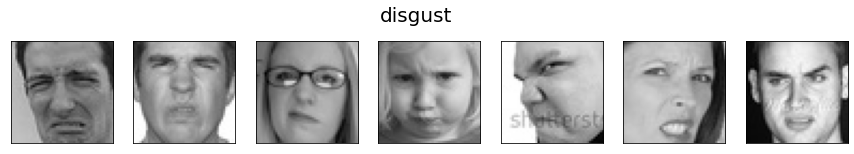

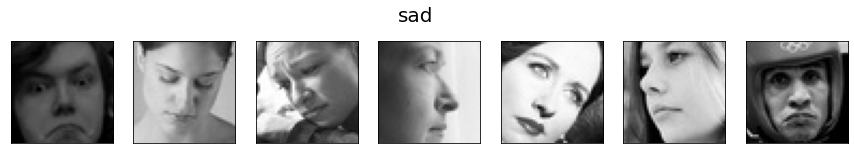

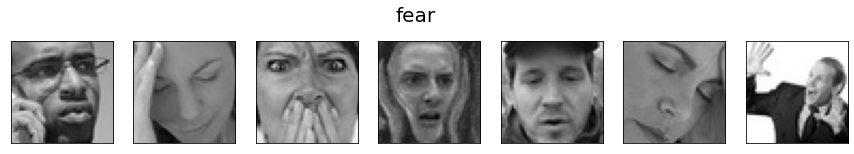

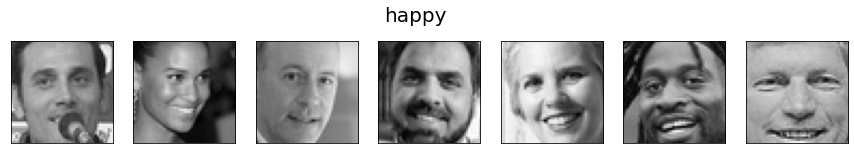

In [ ]:
for i in os.listdir(train_dir):
    plotImages(i)